In [1]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_excel("C:/Users/dell/Downloads/Data_Train.xlsx")

In [4]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
data.shape

(10683, 11)

In [6]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# Missing Values

In [8]:
count=data.isnull().sum()
count

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
data.dropna(inplace=True)

In [10]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

# Converting Time from object to datetime

In [12]:
def time_conversion(feature):
    data[feature]=pd.to_datetime(data[feature])

In [13]:
li=['Date_of_Journey','Dep_Time','Arrival_Time']
for i in li:
    time_conversion(i)

In [14]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

# Extracting day and month from Date_of_Journey column

In [15]:
data['Journey_Day']=data['Date_of_Journey'].dt.day
data['Journey_Month']=data['Date_of_Journey'].dt.month

In [16]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-06-26 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-06-26 05:50:00,2021-06-26 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-06-26 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-06-26 18:05:00,2021-06-26 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-06-26 16:50:00,2021-06-26 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [17]:
data.drop(['Date_of_Journey'],axis=1,inplace=True)

In [18]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-06-26 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-06-26 05:50:00,2021-06-26 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-06-26 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-06-26 18:05:00,2021-06-26 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-06-26 16:50:00,2021-06-26 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [19]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-06-26 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-06-26 05:50:00,2021-06-26 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-06-26 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-06-26 18:05:00,2021-06-26 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-06-26 16:50:00,2021-06-26 21:35:00,4h 45m,1 stop,No info,13302,3,1


# Extracting Hour and Minutes from Dept_Time, Arrival_Time.

In [20]:
def extract_hour(df,feature):
    df[feature+'_Hour']=data[feature].dt.hour
    
def extract_minute(df,feature):
    df[feature+'_Minute']=data[feature].dt.minute

def drop_col(df,feature):
    df.drop(feature, axis=1, inplace=True)

In [21]:
extract_hour(data,'Dep_Time')
extract_minute(data,'Dep_Time')
drop_col(data,'Dep_Time')

In [22]:
extract_hour(data,'Arrival_Time')
extract_minute(data,'Arrival_Time')
drop_col(data,'Arrival_Time')

In [23]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


# Extracting Hour and Minute from Duration column.

In [24]:
duration=list(data['Duration'])

In [25]:
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i]=duration[i]+' 0m'
        else:
            duration[i]='0h '+duration[i]

In [26]:
data['Duration']=duration

In [27]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [28]:
x='7h 25m'
x.split(' ')[0][0:-1]

'7'

In [29]:
x='7h 25m'
x.split(' ')[1][0:-1]

'25'

In [30]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minute(x):
    return x.split(' ')[1][0:-1]

In [31]:
data['Duration_Hour']=data['Duration'].apply(hour)
data['Duration_Minute']=data['Duration'].apply(minute)

In [32]:
drop_col(data,'Duration')

In [33]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [34]:
data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_Day             int64
Journey_Month           int64
Dep_Time_Hour           int64
Dep_Time_Minute         int64
Arrival_Time_Hour       int64
Arrival_Time_Minute     int64
Duration_Hour          object
Duration_Minute        object
dtype: object

In [35]:
data['Duration_Hour']=data['Duration_Hour'].astype(int)
data['Duration_Minute']=data['Duration_Minute'].astype(int)

In [36]:
data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
Journey_Day             int64
Journey_Month           int64
Dep_Time_Hour           int64
Dep_Time_Minute         int64
Arrival_Time_Hour       int64
Arrival_Time_Minute     int64
Duration_Hour           int32
Duration_Minute         int32
dtype: object

# Converting into Categorical and Numericals columns

In [37]:
cat_col=[col for col in data.columns if data[col].dtype=='O']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [38]:
num_col=[col for col in data.columns if data[col].dtype!='O']
num_col

['Price',
 'Journey_Day',
 'Journey_Month',
 'Dep_Time_Hour',
 'Dep_Time_Minute',
 'Arrival_Time_Hour',
 'Arrival_Time_Minute',
 'Duration_Hour',
 'Duration_Minute']

In [39]:
len(num_col)

9

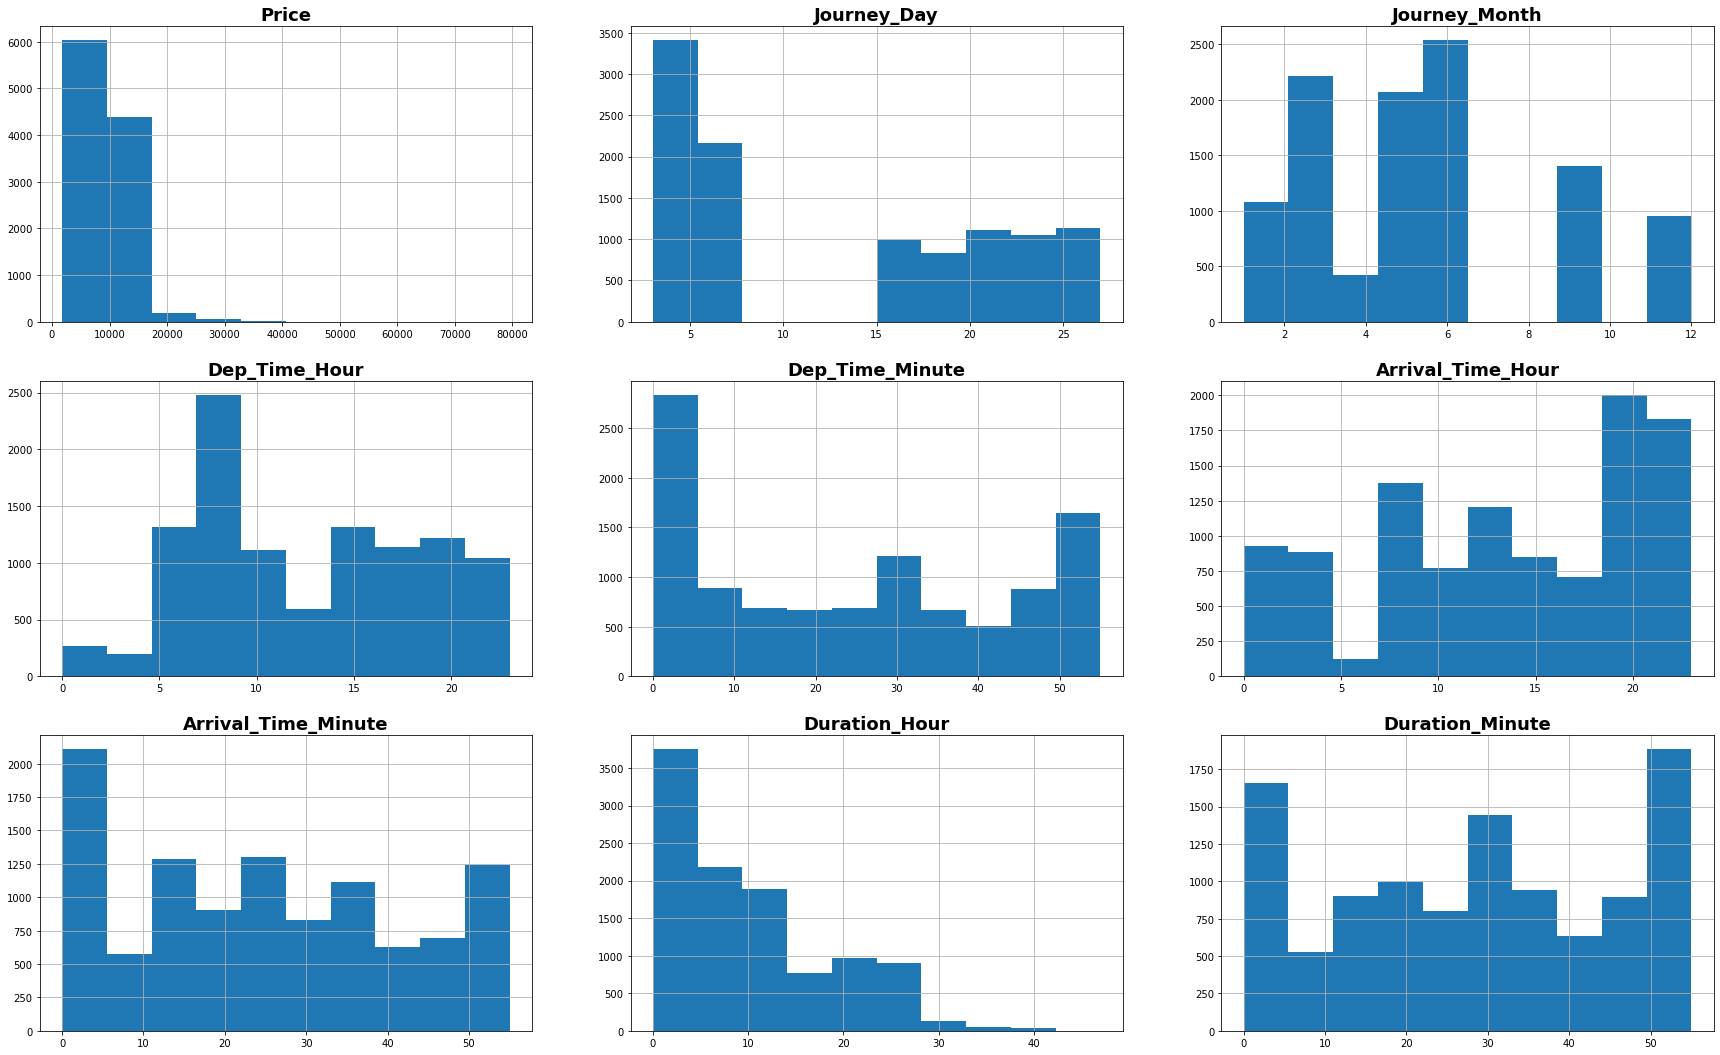

In [40]:
plt.figure(figsize=(30,25))
for i,feature in enumerate(num_col):
    plt.subplot(4,3,i+1)
    data[feature].hist()
    plt.title(feature, weight='bold',fontsize=18)

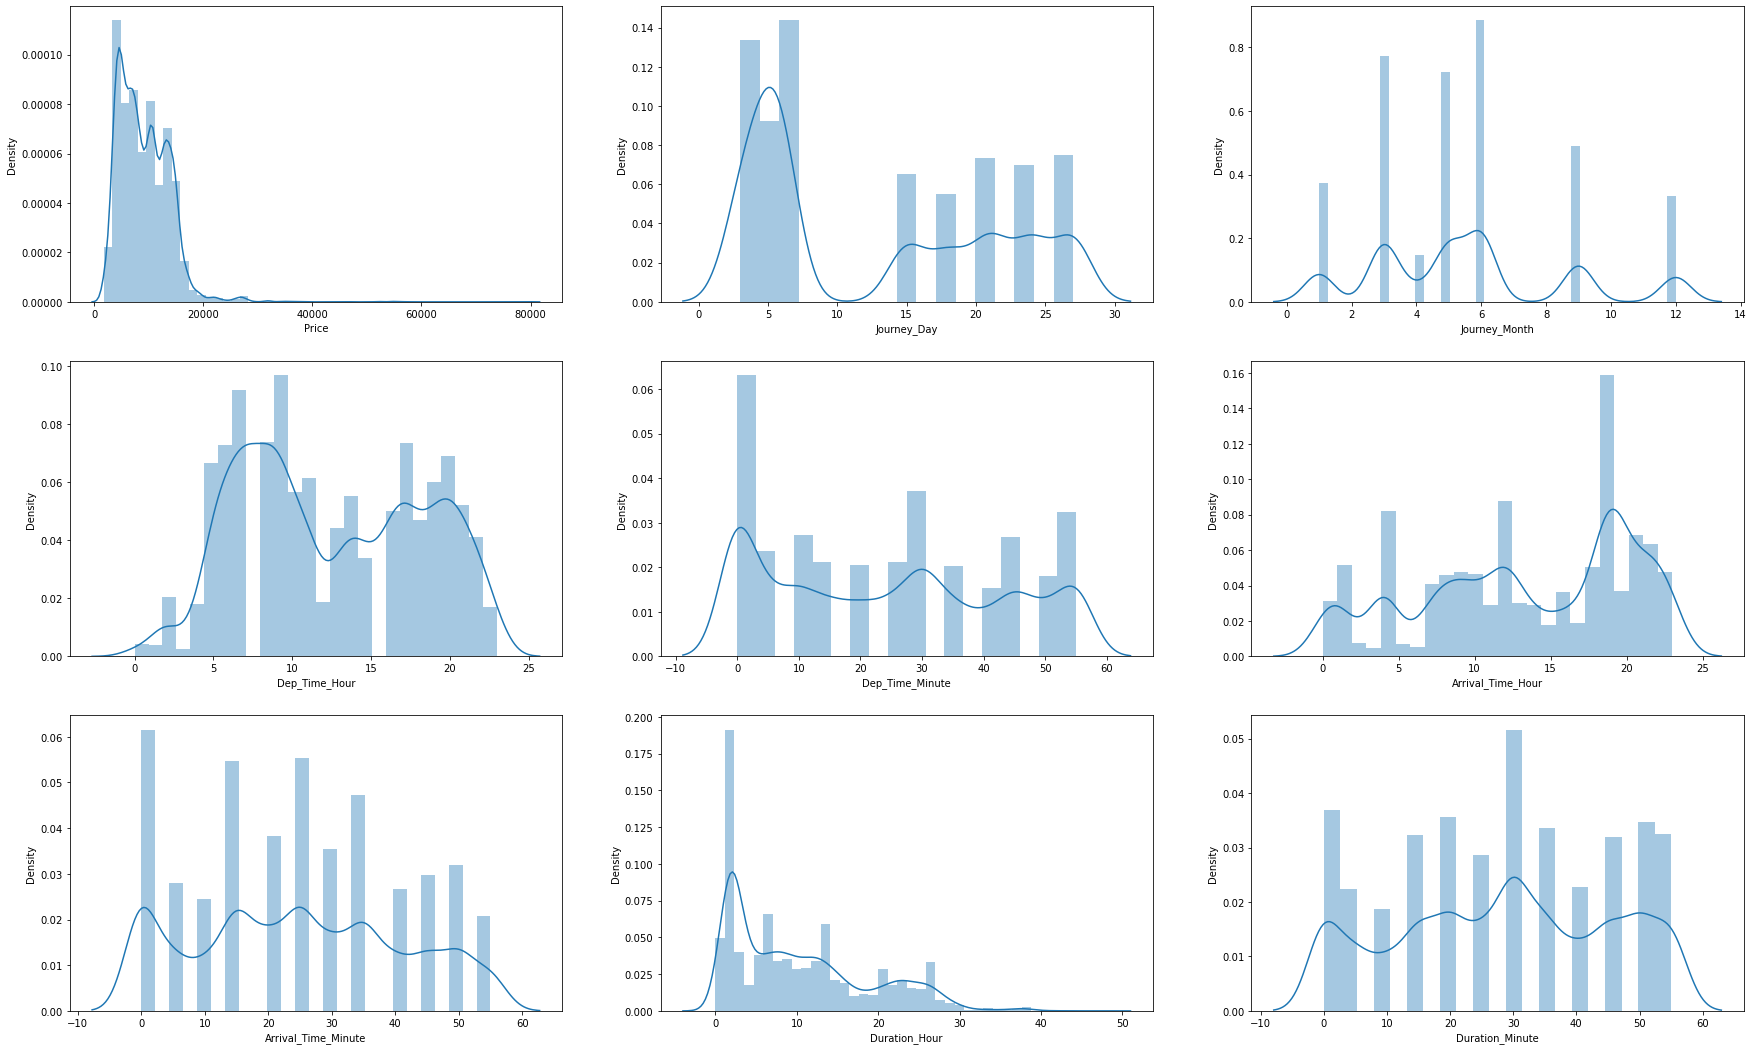

In [41]:
plt.figure(figsize=(30,25))
for i,feature in enumerate(num_col):
    plt.subplot(4,3,i+1)
    sns.distplot(data[feature])

In [42]:
len(cat_col)

6

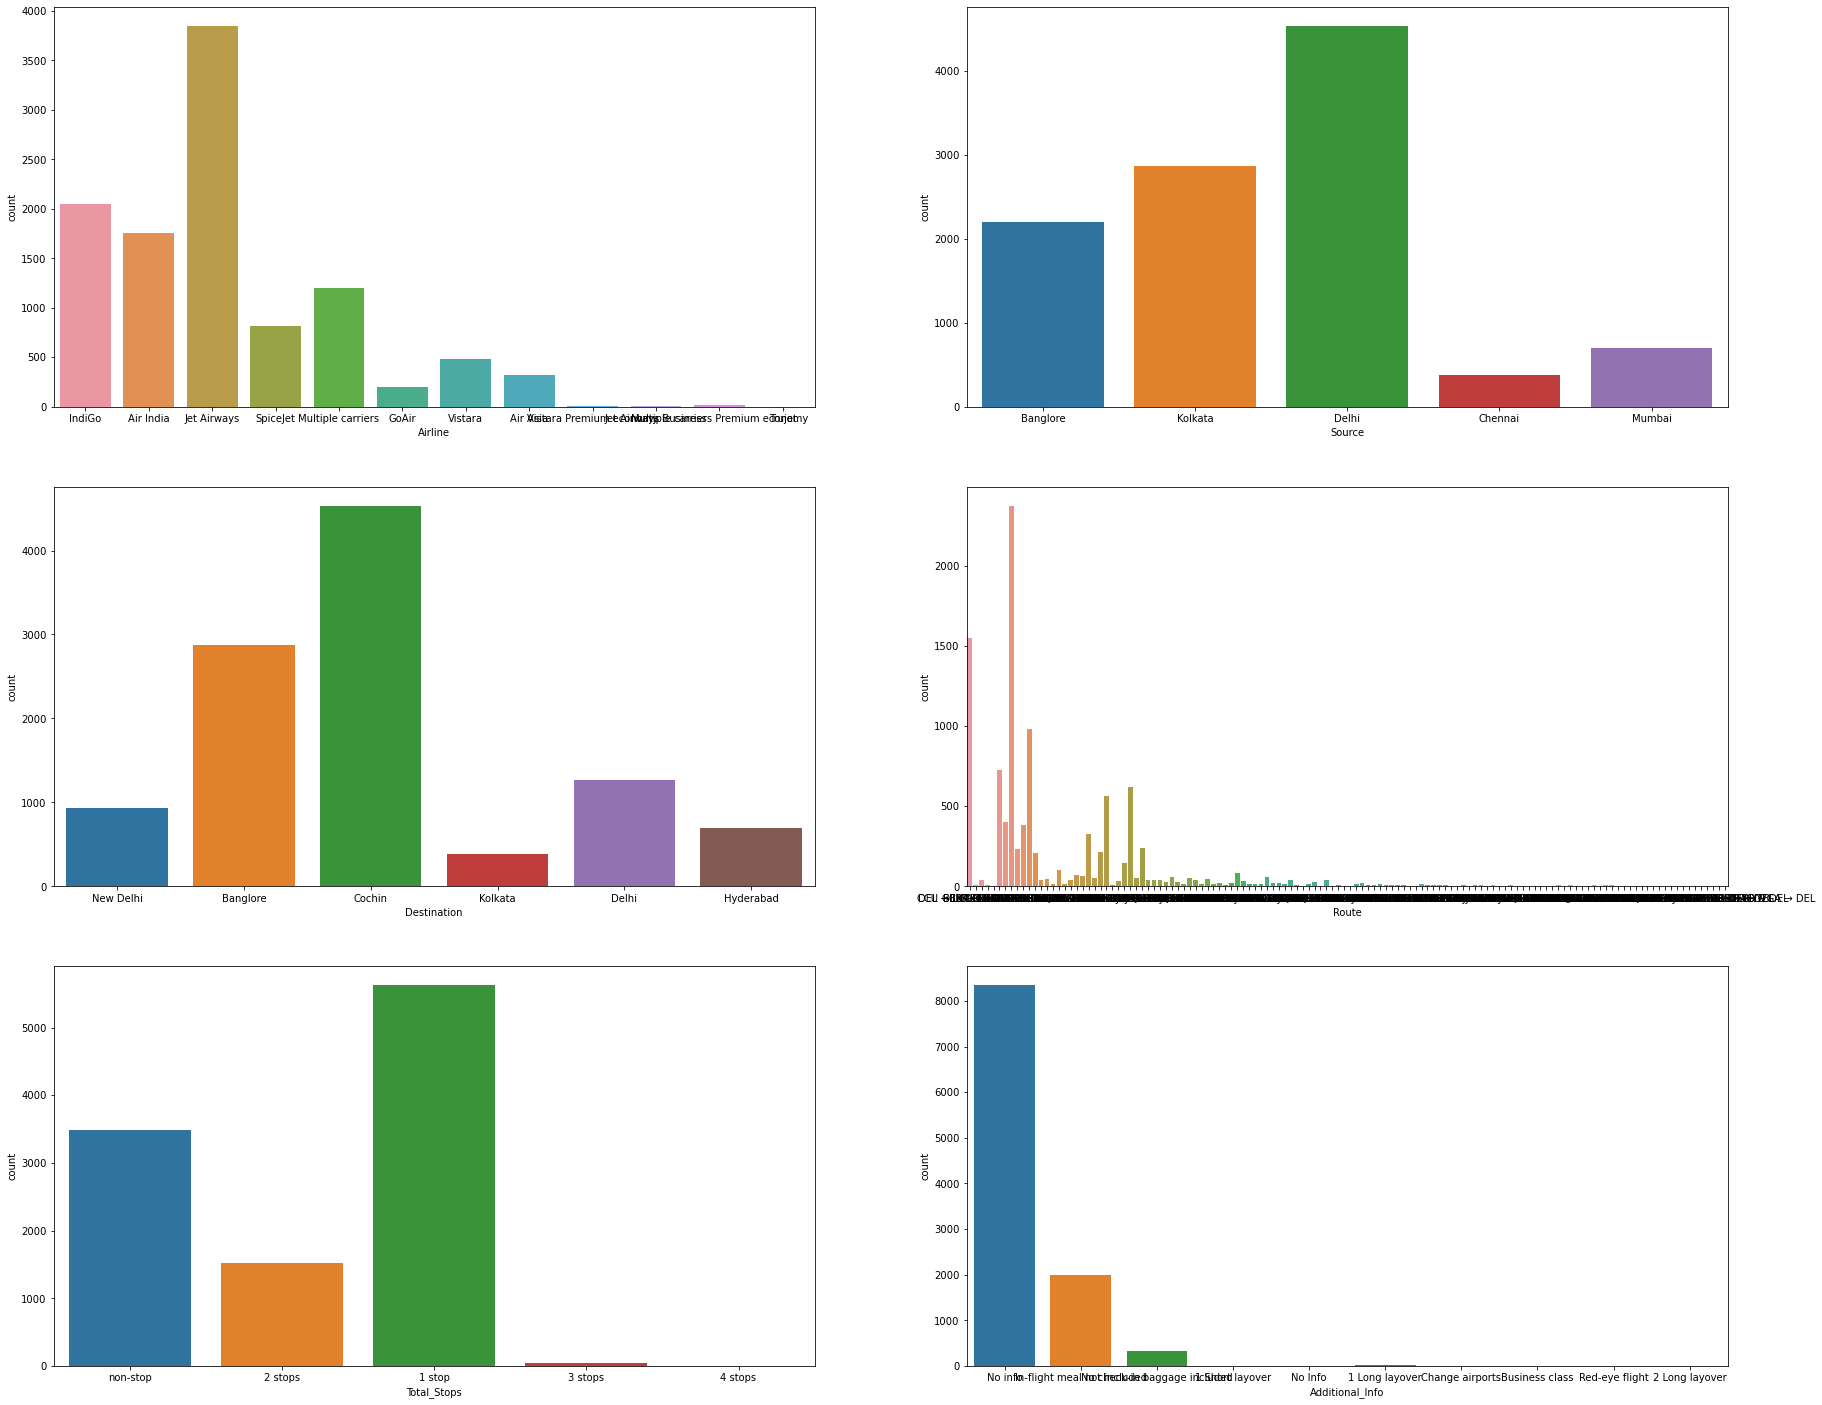

In [43]:
plt.figure(figsize=(30,25))
for i,feature in enumerate(cat_col):
    plt.subplot(3,2,i+1)
    sns.countplot(data[feature])

In [44]:
print(data.Airline.unique())
print(data.Airline.value_counts())

['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


Maximum flights are - Jet Airways.

<AxesSubplot:xlabel='Airline', ylabel='Price'>

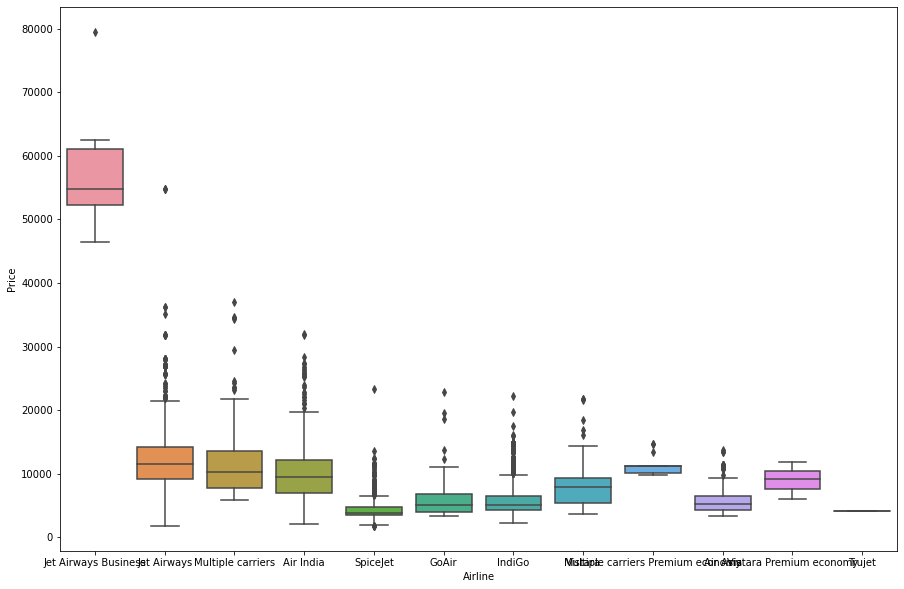

In [45]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Airline', y='Price', data=data.sort_values('Price',ascending=False))

Jet Airways has the highest price.

In [46]:
data.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

Maximum times, the source from where the journey starts is Delhi.

<AxesSubplot:xlabel='Source', ylabel='Price'>

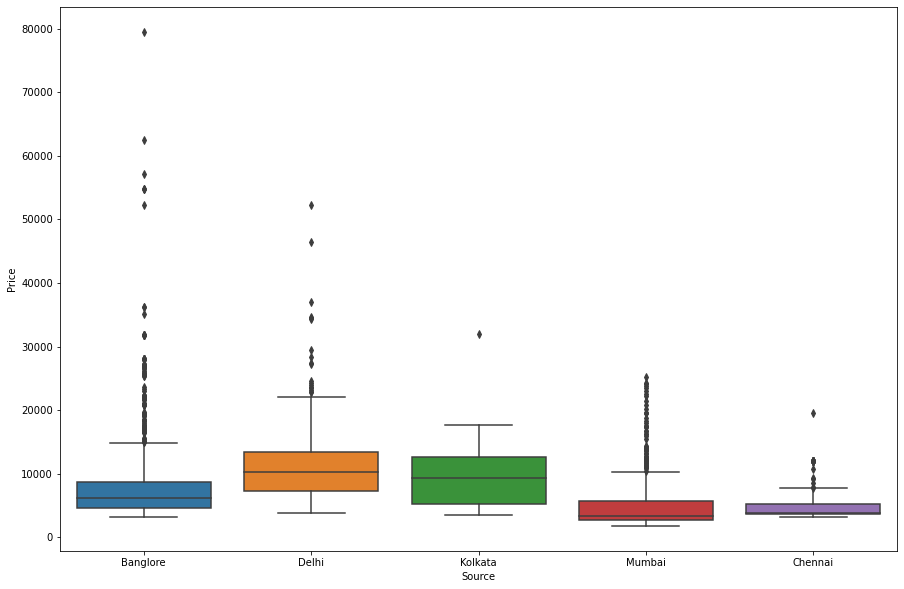

In [47]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Source', y='Price', data=data.sort_values('Price',ascending=False))

Bangalore and Delhi have some outliers. These have the maximum price.

In [48]:
data.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

Maximum times, the destination is Cochin.

<AxesSubplot:xlabel='Destination', ylabel='Price'>

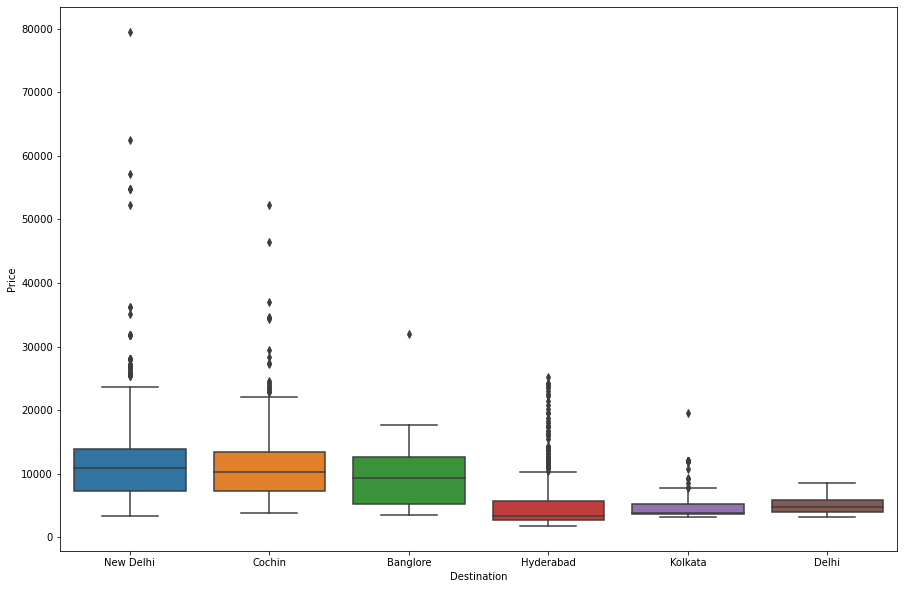

In [49]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Destination', y='Price', data=data.sort_values('Price',ascending=False))

Delhi and Cochin have the highest prices.

In [50]:
data.Additional_Info.value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

No additional info is provided most of the times.

Maximum journeys are in months of June, March and May.

In [51]:
data.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

Maximum number of stops is 1.

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

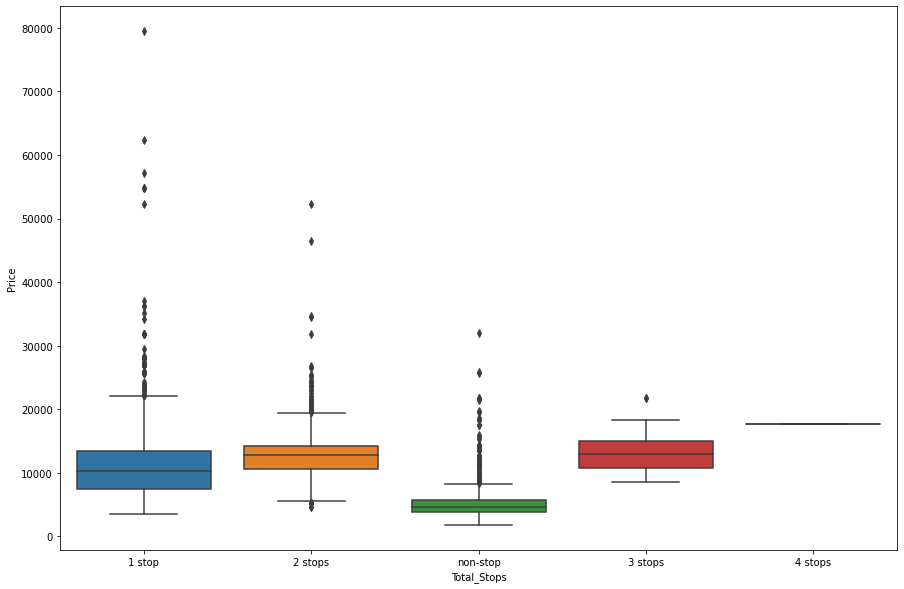

In [52]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Total_Stops', y='Price', data=data.sort_values('Price',ascending=False))

1 stop has some outliers and the price is also high while flights having 4 stops do not fluctuate much in price.

In [53]:
category=data[cat_col]
category.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


# Performing OneHotEncoding to Airline, Source and Destination columns.

In [54]:
Airline= pd.get_dummies(category['Airline'],drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [55]:
Source= pd.get_dummies(category['Source'],drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [56]:
Destination= pd.get_dummies(category['Destination'],drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [57]:
category.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


# Splitting the Route column to extract useful information

In [58]:
x='BLR → DEL'
x.split(' → ')[1]

'DEL'

In [59]:
category['Route1'] = category['Route'].str.split(' → ').str[0]
category['Route2'] = category['Route'].str.split(' → ').str[1]
category['Route3'] = category['Route'].str.split(' → ').str[2]
category['Route4'] = category['Route'].str.split(' → ').str[3]
category['Route5'] = category['Route'].str.split(' → ').str[4]

In [60]:
category.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [61]:
drop_col(category,'Route')

In [62]:
category.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,NaN,NaN


# Check for null

In [63]:
category.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route1                 0
Route2                 0
Route3              3491
Route4              9116
Route5             10636
dtype: int64

In [64]:
nan=['Route3','Route4','Route5']
for i in nan:
    category[i].fillna('None', inplace=True)

In [65]:
category.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route1             0
Route2             0
Route3             0
Route4             0
Route5             0
dtype: int64

In [66]:
for i in category.columns:
    print('{} has {} categories'.format(i,len(category[i].value_counts())))

Airline has 12 categories
Source has 5 categories
Destination has 6 categories
Total_Stops has 5 categories
Additional_Info has 10 categories
Route1 has 5 categories
Route2 has 40 categories
Route3 has 27 categories
Route4 has 12 categories
Route5 has 6 categories


Route3, Route4, Route5 have many categories so we will perform LabelEncoding on it.

In [67]:
category.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route1', 'Route2', 'Route3', 'Route4', 'Route5'],
      dtype='object')

In [68]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [69]:
for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']:
       category[i]= encoder.fit_transform(category[i])

In [70]:
category.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,10,21,10,4
1,Air India,Kolkata,Banglore,2 stops,No info,2,20,1,3,4
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,27,4,5,4
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,29,3,10,4
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,29,7,10,4


In [71]:
category['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [72]:
data.shape[0]

10682

As there are no information provided mostly, so we can drop this column.

In [73]:
drop_col(category,'Additional_Info')

In [74]:
category.head()

,Airline,Source,Destination,Total_Stops,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,non-stop,0,10,21,10,4
1,Air India,Kolkata,Banglore,2 stops,2,20,1,3,4
2,Jet Airways,Delhi,Cochin,2 stops,3,27,4,5,4
3,IndiGo,Kolkata,Banglore,1 stop,2,29,3,10,4
4,IndiGo,Banglore,New Delhi,1 stop,0,29,7,10,4


In [75]:
drop_col(category,'Airline')
drop_col(category,'Source')
drop_col(category,'Destination')

In [76]:
category.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5
0,non-stop,0,10,21,10,4
1,2 stops,2,20,1,3,4
2,2 stops,3,27,4,5,4
3,1 stop,2,29,3,10,4
4,1 stop,0,29,7,10,4


In [77]:
category.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [78]:
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [79]:
category['Total_Stops']=category['Total_Stops'].map(dict)

In [80]:
category.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5
0,0,0,10,21,10,4
1,2,2,20,1,3,4
2,2,3,27,4,5,4
3,1,2,29,3,10,4
4,1,0,29,7,10,4


In [81]:
categorical=pd.concat([category,Airline,Source,Destination], axis=1)

In [82]:
categorical.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,10,21,10,4,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,2,2,20,1,3,4,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,3,27,4,5,4,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
3,1,2,29,3,10,4,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,29,7,10,4,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [83]:
train=pd.concat([categorical,data[num_col]],axis=1)

In [84]:
train.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,Journey_Day,Journey_Month,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hour,Duration_Minute
0,0,0,10,21,10,4,0,0,1,0,...,1,3897,24,3,22,20,1,10,2,50
1,2,2,20,1,3,4,1,0,0,0,...,0,7662,5,1,5,50,13,15,7,25
2,2,3,27,4,5,4,0,0,0,1,...,0,13882,6,9,9,25,4,25,19,0
3,1,2,29,3,10,4,0,0,1,0,...,0,6218,5,12,18,5,23,30,5,25
4,1,0,29,7,10,4,0,0,1,0,...,1,13302,3,1,16,50,21,35,4,45


In [85]:
pd.set_option('display.max_columns',50)

In [86]:
train.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_Day,Journey_Month,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hour,Duration_Minute
0,0,0,10,21,10,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,2,2,20,1,3,4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,2,3,27,4,5,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,1,2,29,3,10,4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,1,0,29,7,10,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


# Check for Outliers

In [87]:
def plot(col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(train[col],ax=ax1)
    sns.boxplot(train[col],ax=ax2)

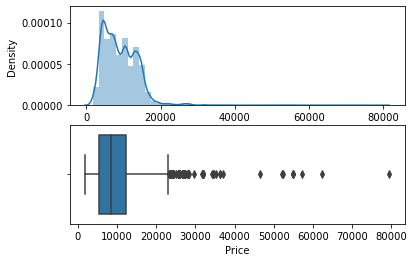

In [88]:
plot('Price')

There are some outliers, so we can impute these values by median above 40k.

In [89]:
train['Price']=np.where(train['Price']>=40000,train['Price'].median(),train['Price'])

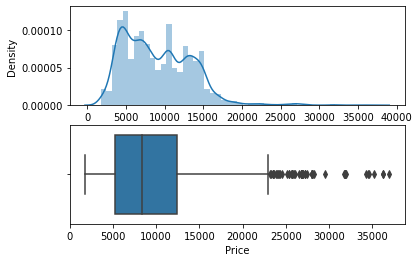

In [90]:
plot('Price')

# Split data into dependent and independent features

In [91]:
X=train.drop('Price',axis=1)
X.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Journey_Day,Journey_Month,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hour,Duration_Minute
0,0,0,10,21,10,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50
1,2,2,20,1,3,4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,5,50,13,15,7,25
2,2,3,27,4,5,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,9,25,4,25,19,0
3,1,2,29,3,10,4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,18,5,23,30,5,25
4,1,0,29,7,10,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,16,50,21,35,4,45


In [92]:
y=train['Price']
y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

# Feature Selection

In [93]:
from sklearn.feature_selection import mutual_info_classif

In [94]:
mutual_info_classif(X,y)

array([2.16569710e+00, 2.02319461e+00, 2.43113724e+00, 2.23831936e+00,
       1.08959754e+00, 1.78252612e+00, 7.74217824e-01, 9.71106706e-02,
       6.64375230e-01, 9.20323730e-01, 1.60745623e-03, 5.60258608e-01,
       6.36553116e-03, 3.16363092e-01, 7.84895391e-03, 2.35894291e-01,
       0.00000000e+00, 1.74701363e-01, 1.55700579e+00, 8.80911226e-01,
       2.92372122e-01, 1.54027783e+00, 4.04596769e-01, 3.09201875e-01,
       1.60289984e-01, 3.85332200e-01, 1.07081317e+00, 8.45245786e-01,
       1.40291446e+00, 1.18424281e+00, 1.86514172e+00, 1.55426541e+00,
       1.76274542e+00, 1.07459346e+00])

In [95]:
imp=pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

,0
Total_Stops,2.155379
Route1,2.028251
Route2,2.405863
Route3,2.248858
Route4,1.066200
Route5,1.807666
Air India,0.758016
GoAir,0.116213
IndiGo,0.673102
Jet Airways,0.934786


In [96]:
imp.columns=['Importance']
imp

,Importance
Total_Stops,2.155379
Route1,2.028251
Route2,2.405863
Route3,2.248858
Route4,1.066200
Route5,1.807666
Air India,0.758016
GoAir,0.116213
IndiGo,0.673102
Jet Airways,0.934786


In [97]:
imp.sort_values(by='Importance',ascending=False)

,Importance
Route2,2.405863
Route3,2.248858
Total_Stops,2.155379
Route1,2.028251
Arrival_Time_Hour,1.849956
Route5,1.807666
Duration_Hour,1.779164
Delhi,1.546916
Arrival_Time_Minute,1.539658
Cochin,1.522629


Top 5 dependent variables are - Route2, Route3, Total_Stops, Route1, Arrival_Time_Hour and the least related is Vistara Premium economy.

# Model

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25, random_state=0)

In [100]:
from sklearn import metrics
import pickle

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor

In [102]:
def predict(my_model,dump):
    model=my_model.fit(X_train,y_train)
    print('Score : {} '.format(model.score(X_train, y_train)))
    y_pred = model.predict(X_test)
    print('Predcitions : {} '.format(y_pred))
    print('\n')
    r2_score=metrics.r2_score(y_test, y_pred)
    print('R2 Score : {} '.format(r2_score))
    print('MAE : {} '.format(metrics.mean_absolute_error(y_test,y_pred)))
    print('MSE : {} '.format(metrics.mean_squared_error(y_test,y_pred)))
    print('RMSE : {} '.format(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))
    sns.distplot(y_test-y_pred)
    
    if dump==1:
        file=open("C:/Users/dell/Downloads.pkl",'wb')
        pickle.dump(model,file)

Score : 0.9567801615055455 
Predcitions : [12184.58883333  6142.15        3558.005      ...  7758.57
  6980.14416667  6549.12      ] 


R2 Score : 0.812327231321708 
MAE : 1174.7355767877248 
MSE : 3711288.209969385 
RMSE : 1926.4704020486236 


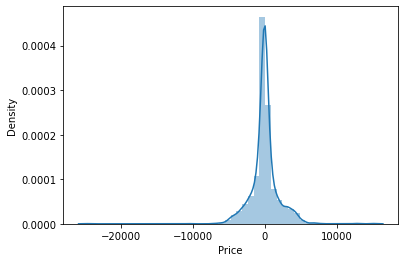

In [103]:
predict(RandomForestRegressor(),1)

As most of the data lie near 0 and it looks like a normal distribution, so we can say that RandomForest performs well on the data.

Score : 0.6176648318889307 
Predcitions : [11595.32229009  6091.77391309  3061.33534824 ... 10475.69871066
  8424.98082668  8061.57413579] 


R2 Score : 0.6070762603168742 
MAE : 1974.2020062463719 
MSE : 7770190.91673762 
RMSE : 2787.5062182419647 


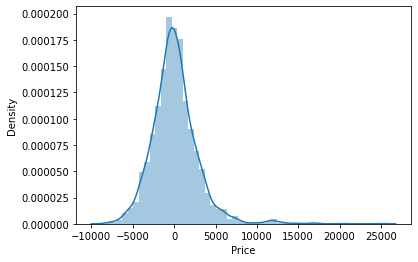

In [104]:
predict(LinearRegression(),0)

Score : 0.9703293390357663 
Predcitions : [14781.  5636.  3543. ...  7575.  7229.  6686.] 


R2 Score : 0.7187051525934678 
MAE : 1318.4149007862225 
MSE : 5562694.353886601 
RMSE : 2358.536485595803 


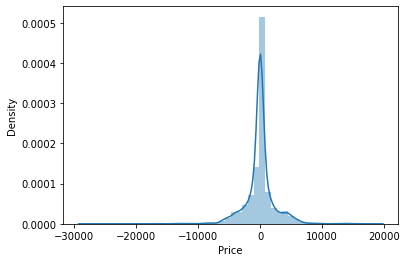

In [105]:
predict(DecisionTreeRegressor(),0)

Score : 0.7712804640880171 
Predcitions : [12586.6  6164.8  6940.2 ...  9090.4  6980.2  9813.2] 


R2 Score : 0.6391496004549504 
MAE : 1776.0054661175589 
MSE : 7135930.496608013 
RMSE : 2671.316247958675 


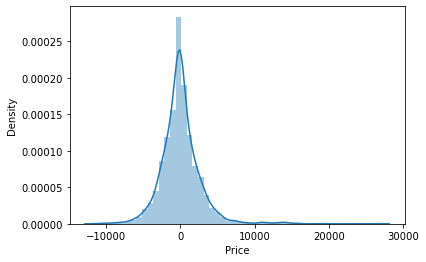

In [106]:
predict(KNeighborsRegressor(),0)

KNN and Linear Regression performs worst while Random Forest performs the best.

In [107]:
from sklearn.svm import SVR

Score : 0.025136873801159143 
Predcitions : [8354.63022873 8283.15509303 8103.2681053  ... 8270.57044189 8220.55717093
 8350.4086326 ] 


R2 Score : 0.021180948746108652 
MAE : 3515.43505628213 
MSE : 19356455.548642296 
RMSE : 4399.597202999645 


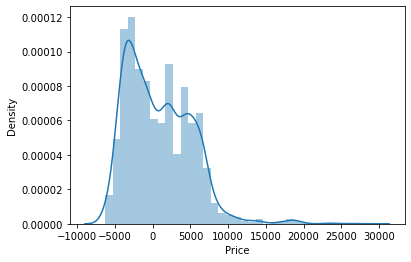

In [108]:
predict(SVR(),0)

SVR performs exceptionally worst.

In [109]:
from sklearn.ensemble import GradientBoostingRegressor

Score : 0.804111474747987 
Predcitions : [12276.90812448  6137.11621333  4093.02305408 ... 10278.84538738
  6848.05886364  8239.05223011] 


R2 Score : 0.7893095502718275 
MAE : 1465.6894683481235 
MSE : 4166470.1146371486 
RMSE : 2041.1933065334965 


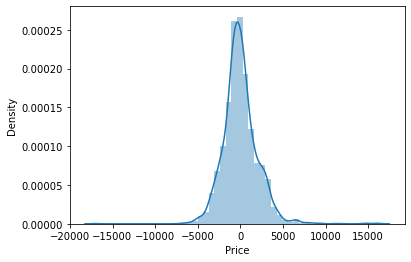

In [110]:
predict(GradientBoostingRegressor(),0)

Score : 0.4787167644488828 
Predcitions : [14781.  6582.  3543. ...  8476.  4544.  8855.] 


R2 Score : 0.6202063345116962 
MAE : 1578.8292774241856 
MSE : 7510539.557094721 
RMSE : 2740.536363030916 


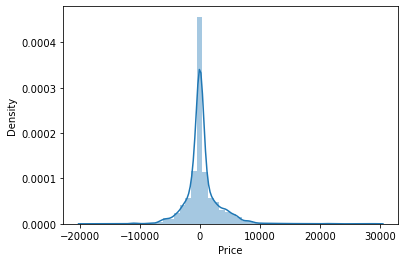

In [111]:
predict(GaussianNB(),0)

In [112]:
train.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_Day,Journey_Month,Dep_Time_Hour,Dep_Time_Minute,Arrival_Time_Hour,Arrival_Time_Minute,Duration_Hour,Duration_Minute
0,0,0,10,21,10,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897.0,24,3,22,20,1,10,2,50
1,2,2,20,1,3,4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662.0,5,1,5,50,13,15,7,25
2,2,3,27,4,5,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882.0,6,9,9,25,4,25,19,0
3,1,2,29,3,10,4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218.0,5,12,18,5,23,30,5,25
4,1,0,29,7,10,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302.0,3,1,16,50,21,35,4,45


In [113]:
X_new = train.drop(['Price','Jet Airways Business','Vistara Premium economy','Trujet','GoAir','Multiple carriers Premium economy'], axis=1)
y_new = train['Price']

In [114]:
X_new_train, X_new_test, y_new_train, y_new_test=train_test_split(X_new, y_new, test_size=0.25, random_state=0)

In [115]:
def my_mod(my_model):
    model=my_model.fit(X_new_train,y_new_train)
    print('Score : {} '.format(model.score(X_new_train, y_new_train)))
    y_pred = model.predict(X_new_test)
    print('Predcitions : {} '.format(y_pred))
    print('\n')
    r2_score=metrics.r2_score(y_new_test, y_pred)
    print('R2 Score : {} '.format(r2_score))
    print('MAE : {} '.format(metrics.mean_absolute_error(y_new_test,y_pred)))
    print('MSE : {} '.format(metrics.mean_squared_error(y_new_test,y_pred)))
    print('RMSE : {} '.format(np.sqrt(metrics.mean_squared_error(y_new_test,y_pred))))
    sns.distplot(y_new_test-y_pred)

Score : 0.9559147806698182 
Predcitions : [12111.66935714  6074.71        3566.423      ...  7814.7
  6891.64666667  6794.32      ] 


R2 Score : 0.8138533204352498 
MAE : 1172.5151722449314 
MSE : 3681109.3162793843 
RMSE : 1918.621723081281 


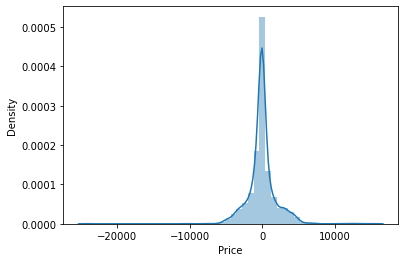

In [116]:
my_mod(RandomForestRegressor())

Score does not vary much after removing least related features.

# Hyperparameter Tuning

RandomSearchCV

In [117]:
from sklearn.model_selection import RandomizedSearchCV

In [118]:
n_estimators=[int(x) for x in np.linspace(100,1200,6)]
criterion=['mse','mae']
max_depth=[int(x) for x in np.linspace(5,30,num=4)]
min_samples_split=[5,10,15,100]
max_features=['auto','sqrt']

In [119]:
random_grid={
    'n_estimators':n_estimators,
    'max_depth':max_depth,
    'criterion':criterion,
    'min_samples_split':min_samples_split,
    'max_features':max_features
}

In [120]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_depth': [5, 13, 21, 30],
 'criterion': ['mse', 'mae'],
 'min_samples_split': [5, 10, 15, 100],
 'max_features': ['auto', 'sqrt']}

In [121]:
randomized_model=RandomizedSearchCV(estimator=RandomForestRegressor(),
    param_distributions=random_grid,
    cv=2,
    verbose=2,
    n_jobs=-1)

In [ ]:
randomized_model.fit(X_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


In [ ]:
randomized_model.best_params_

In [ ]:
y_predict=randomized_model.predict(X_test)
y_predict

In [ ]:
sns.distplot(y_test-y_predict)

In [ ]:
metrics.r2_score(y_test,y_predict)

In [ ]:
print('MAE',metrics.mean_absolute_error(y_test,y_predict))
print('MSE',metrics.mean_squared_error(y_test,y_predict))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

In [ ]:
# 1. Time to datetime,extract day and hour and minutes from various columns.
# 2. nominal data- that do not have order in them / hierarchy.(OneHotEnconding)
# 3. ordinal data- that have hierarchy/ order in them(LabelEncoding)
# 4. Outliers- median imputing for outliers
# 5. Feature selection- impurity gain (Dependence Between Variables (feature selection): Mutual Information)
# 6. Dumping model(using pickle)
# 7. Hyperparameter Tuning-RandomizedSearchCV